# Introduction

This analysis for my Google Data Analytics Capstone - Case Study 1

Scenario: "*You are a junior DA working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore,
your team wants to **understand how casual riders and annual members use Cyclistic bikes differently**. From these insights,
your team will design a new marketing strategy to convert casual riders into annual members*"



# Ask

The business task of the project is to anwser the question: **"How do annual members and casual riders use Cyclistic bikes differently?"**

# Prepare

The data has been made available by Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement). This is public data you can use to explore how different customer types are using Cyclistic bikes. But note that data-privacy issues prohibit you from using riders' personally identifiable information. Accordingly, I wouldn’t be able to connect pass purchases to credit card numbers to determine if casual riders live in the Cyclistic service area or if they have purchased multiple single passes.

# Process

I get data available in Kaggle and choose to use Python as the major tool for this project.

## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Import data

Import from 13 individual csv files for each month (from April 2020 to April 2021) and check data structure as well as null values and data types of each columns.

In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import json
f = open("kaggle.json")
key = json.load(f)

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andysantiago/cyclistics-data-april-2020-march-2021")

100%|██████████| 156M/156M [00:02<00:00, 80.0MB/s]


In [5]:
import os
files = []
for dirname, _, filenames in os.walk('/content/cyclistics-data-april-2020-march-2021'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        
files

['/content/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202104-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202102-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202103-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202004-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202101-divvy-tripdata.csv',
 '/content/cyclistics-data-april-2020-march-2021/202005-divvy-tripdata.csv']

In [6]:
df = pd.concat((pd.read_csv(f) for f in files), ignore_index=True)
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,41.906866,-87.626217,41.906724,-87.634830,member
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,41.943670,-87.648950,41.984045,-87.660274,member
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,41.932588,-87.636427,41.936497,-87.647539,casual
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,41.890762,-87.631697,41.918306,-87.636282,casual
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,41.911722,-87.626804,41.907993,-87.631501,member


In [7]:
# Number of rows, columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 3826978
Number of columns: 13


In [8]:
# Number of duplicated rows
print(f'Number of duplicated rows: {sum(df.duplicated())}')

Number of duplicated rows: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3826978 entries, 0 to 3826977
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 379.6+ MB


In [10]:
# Number of null rows in each columns
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    148231
start_station_id      148857
end_station_name      171416
end_station_id        171877
start_lat                  0
start_lng                  0
end_lat                 5005
end_lng                 5005
member_casual              0
dtype: int64

## Preprocessing

In [11]:
# Remove null rows
df.dropna(inplace = True)
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [12]:
# Remove start_lat, end_lat, start_lng, end_lng as this data was dropped beginning in 2020 (as explaining in script)
df.drop(columns = ['start_lat','start_lng','end_lat','end_lng'], inplace = True)

In [13]:
# Convert ended_at and started_at to datetime
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['started_at'] = pd.to_datetime(df['started_at'])

In [14]:
# Calculate the range of each ride
df['ride_length'] = df['ended_at'] - df['started_at']
df['ride_length']

0         0 days 00:03:50
1         0 days 00:23:47
2         0 days 00:07:15
3         0 days 00:20:56
4         0 days 00:05:08
                ...      
3826973   0 days 00:40:52
3826974   0 days 00:35:49
3826975   0 days 00:07:38
3826976   0 days 00:36:48
3826977   0 days 00:39:25
Name: ride_length, Length: 3592898, dtype: timedelta64[ns]

In [15]:
# There are some rides where tripduration shows up as negative, including several hundred rides where 
# Divvy took bikes out of circulation for Quality Control reasons. We will want to delete these rides
df['days'] = df['ride_length'].apply(lambda x: x.days)
df = df[df['days']>=0]

In [16]:
def time_to_minutes(td):
#     hours = td.days*24 +  td.seconds // 3600
#     minutes = (td.seconds%3600)//60
#     seconds = (td.seconds%3600)%60
    return round(td.days*60*24 + td.seconds/60,3)

In [17]:
# Convert ride_length to minutes
df['ride_length'] = df['ride_length'].apply(lambda x: time_to_minutes(x))

In [18]:
# Drop rows which ride_length equals 0
df = df[df['ride_length'] > 1]

In [19]:
# Monday: 0, Sunday: 6
df['day_of_week'] = df['started_at'].apply(lambda x: x.weekday()) 

In [20]:
# Add day, month, year columns from started_at column
df['day'] = df['started_at'].apply(lambda x: x.day)
df['month'] = df['started_at'].apply(lambda x: x.month)
df['year'] = df['started_at'].apply(lambda x: x.year)
df['hours'] = df['started_at'].apply(lambda x: x.hour)

In [21]:
df['date'] = df['started_at'].apply(lambda x: x.date())
df['date'] = pd.to_datetime(df['date'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3535506 entries, 0 to 3826977
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   ride_length         float64       
 10  days                int64         
 11  day_of_week         int64         
 12  day                 int64         
 13  month               int64         
 14  year                int64         
 15  hours               int64         
 16  date                datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(6), object(7)
memory usage: 485.5+ MB


In [23]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,hours,date
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,member,3.833,0,3,9,7,2020,15,2020-07-09
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,member,23.783,0,4,24,7,2020,23,2020-07-24
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,casual,7.250,0,2,8,7,2020,19,2020-07-08
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,casual,20.933,0,4,17,7,2020,19,2020-07-17
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,member,5.133,0,5,4,7,2020,10,2020-07-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826973,11C316914A7AF2F9,docked_bike,2020-05-30 12:48:07,2020-05-30 13:28:59,Michigan Ave & 8th St,623,Broadway & Barry Ave,300.0,casual,40.867,0,5,30,5,2020,12,2020-05-30
3826974,DEA1AB8AB6A5E995,docked_bike,2020-05-30 20:21:32,2020-05-30 20:57:21,Michigan Ave & Jackson Blvd,284,Calumet Ave & 35th St,335.0,member,35.817,0,5,30,5,2020,20,2020-05-30
3826975,D9EBC47F8C828B6E,docked_bike,2020-05-24 11:27:42,2020-05-24 11:35:20,Larrabee St & Webster Ave,144,Racine Ave & Wrightwood Ave,343.0,casual,7.633,0,6,24,5,2020,11,2020-05-24
3826976,9744AA400432C99D,docked_bike,2020-05-06 17:18:46,2020-05-06 17:55:34,Clark St & Berwyn Ave,463,Damen Ave & Foster Ave,464.0,member,36.800,0,2,6,5,2020,17,2020-05-06


# EDA


**EDA casual_df and member_df parallel to show the differences between 2 types of customers**

In [24]:
casual_df = df[df['member_casual'] == "casual"]
casual_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,hours,date
2,D2FD8EA432C77EC1,docked_bike,2020-07-08 19:49:07,2020-07-08 19:56:22,Lake Shore Dr & Diversey Pkwy,329.0,Clark St & Wellington Ave,156.0,casual,7.250,0,2,8,7,2020,19,2020-07-08
3,54AE594E20B35881,docked_bike,2020-07-17 19:06:42,2020-07-17 19:27:38,LaSalle St & Illinois St,181.0,Clark St & Armitage Ave,94.0,casual,20.933,0,4,17,7,2020,19,2020-07-17
5,65636B619E24257F,docked_bike,2020-07-28 16:33:03,2020-07-28 16:49:10,Fairbanks St & Superior St,635.0,Wells St & Concord Ln,289.0,casual,16.117,0,1,28,7,2020,16,2020-07-28
13,7FA38D309B160B59,docked_bike,2020-07-08 23:06:14,2020-07-08 23:12:24,Wells St & Elm St,182.0,State St & Pearson St,106.0,casual,6.167,0,2,8,7,2020,23,2020-07-08
16,8CE8D05B0044D078,docked_bike,2020-07-28 17:19:52,2020-07-28 17:43:41,Lake Shore Dr & Belmont Ave,334.0,Lake Shore Dr & Wellington Ave,157.0,casual,23.817,0,1,28,7,2020,17,2020-07-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826961,10E2D5D3AC3F444D,docked_bike,2020-05-14 17:08:24,2020-05-14 17:54:14,Pine Grove Ave & Irving Park Rd,254,Pine Grove Ave & Irving Park Rd,254.0,casual,45.833,0,3,14,5,2020,17,2020-05-14
3826965,188D14B0D5A6B682,docked_bike,2020-05-24 15:27:08,2020-05-24 15:33:33,Broadway & Berwyn Ave,294,Winthrop Ave & Lawrence Ave,253.0,casual,6.417,0,6,24,5,2020,15,2020-05-24
3826972,055125722DF67BE4,docked_bike,2020-05-29 19:06:51,2020-05-29 19:41:47,Broadway & Waveland Ave,304,Lincoln Park Conservatory,673.0,casual,34.933,0,4,29,5,2020,19,2020-05-29
3826973,11C316914A7AF2F9,docked_bike,2020-05-30 12:48:07,2020-05-30 13:28:59,Michigan Ave & 8th St,623,Broadway & Barry Ave,300.0,casual,40.867,0,5,30,5,2020,12,2020-05-30


In [25]:
member_df = df[df['member_casual'] == "member"]
member_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,ride_length,days,day_of_week,day,month,year,hours,date
0,762198876D69004D,docked_bike,2020-07-09 15:22:02,2020-07-09 15:25:52,Ritchie Ct & Banks St,180.0,Wells St & Evergreen Ave,291.0,member,3.833,0,3,9,7,2020,15,2020-07-09
1,BEC9C9FBA0D4CF1B,docked_bike,2020-07-24 23:56:30,2020-07-25 00:20:17,Halsted St & Roscoe St,299.0,Broadway & Ridge Ave,461.0,member,23.783,0,4,24,7,2020,23,2020-07-24
4,54025FDC7440B56F,docked_bike,2020-07-04 10:39:57,2020-07-04 10:45:05,Lake Shore Dr & North Blvd,268.0,Clark St & Schiller St,301.0,member,5.133,0,5,4,7,2020,10,2020-07-04
6,22DB94283ECFDBD2,docked_bike,2020-07-30 11:58:12,2020-07-30 12:16:12,Bissell St & Armitage Ave,113.0,Dearborn Pkwy & Delaware Pl,140.0,member,18.000,0,3,30,7,2020,11,2020-07-30
7,C9D789BEF899F4B8,docked_bike,2020-07-13 16:48:03,2020-07-13 16:57:00,St. Clair St & Erie St,211.0,Franklin St & Chicago Ave,31.0,member,8.950,0,0,13,7,2020,16,2020-07-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826970,52FCD430515759C6,docked_bike,2020-05-06 17:59:15,2020-05-06 18:07:18,Damen Ave & Foster Ave,464,Clark St & Berwyn Ave,463.0,member,8.050,0,2,6,5,2020,17,2020-05-06
3826971,216D8CF259686F18,docked_bike,2020-05-30 16:05:41,2020-05-30 16:44:08,Damen Ave & Chicago Ave,128,Carpenter St & Huron St,92.0,member,38.450,0,5,30,5,2020,16,2020-05-30
3826974,DEA1AB8AB6A5E995,docked_bike,2020-05-30 20:21:32,2020-05-30 20:57:21,Michigan Ave & Jackson Blvd,284,Calumet Ave & 35th St,335.0,member,35.817,0,5,30,5,2020,20,2020-05-30
3826976,9744AA400432C99D,docked_bike,2020-05-06 17:18:46,2020-05-06 17:55:34,Clark St & Berwyn Ave,463,Damen Ave & Foster Ave,464.0,member,36.800,0,2,6,5,2020,17,2020-05-06


(array([2082140.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 1453366.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

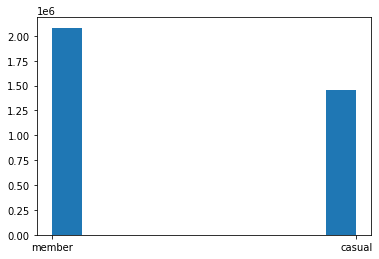

In [26]:
plt.hist(df['member_casual'])

The histogram show that total member usage is higher than total casual usage

## Usage in day of week

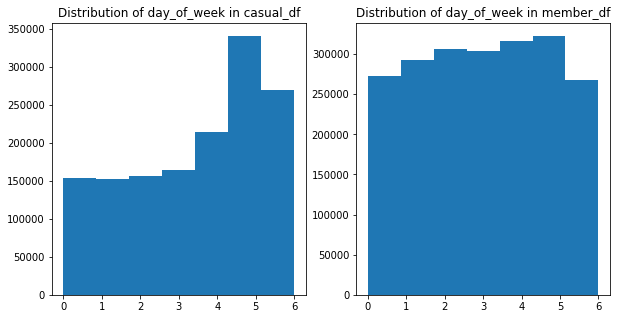

In [27]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(casual_df['day_of_week'],bins=7)
ax2.hist(member_df['day_of_week'],bins=7)

ax1.set_title("Distribution of day_of_week in casual_df")
ax2.set_title("Distribution of day_of_week in member_df")

plt.show()

* Casual usage is very high in weekend compared to their usage in weekday.

* The usage of member in all week is fairly stable.

* In weekday, average usage for casual is lower than member.

* In weekend, the usage is almost the same.

## Usage at different hours of a day




In [28]:
hours_casual = casual_df['hours'].value_counts().sort_index()
hours_member = member_df['hours'].value_counts().sort_index()

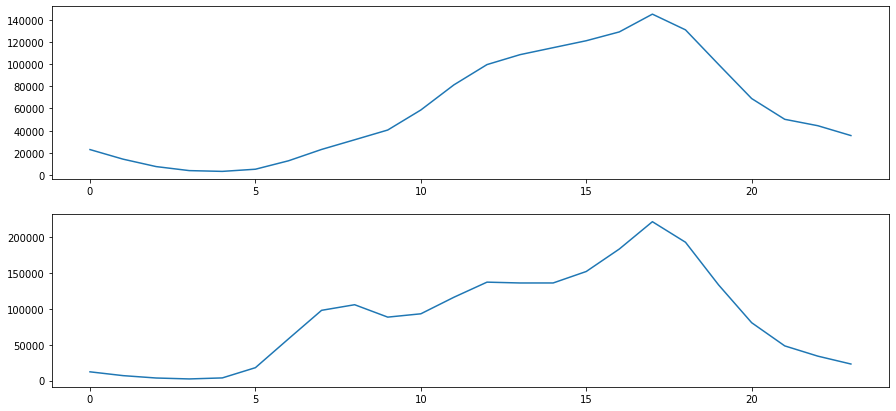

<Figure size 1600x500 with 0 Axes>

In [29]:
# Draw Plot
figure, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7))
plt.figure(figsize=(16,5), dpi=100)

xlabel = "Date"
ylabel = "Counts"

ax1.plot(hours_casual.index, hours_casual[:])
ax2.plot(hours_member.index, hours_member[:])

plt.show()

ax1.set_title("Usage at different hours of a day (casual)")
ax2.set_title("Usage at different hours of a day (member)")

ax1.xlabel = xlabel
ax1.xlabel = xlabel

ax1.ylabel = ylabel
ax1.ylabel = ylabel

* The usage increase in the late afternoon time for both members and casual users.  

* The usage of annual members is higher in morning time compared to casual users. 

### Rideable_type

In [30]:
casual_df['rideable_type'].value_counts()

docked_bike      1126741
electric_bike     187016
classic_bike      139609
Name: rideable_type, dtype: int64

In [31]:
member_df['rideable_type'].value_counts()

docked_bike      1409657
classic_bike      386580
electric_bike     285903
Name: rideable_type, dtype: int64

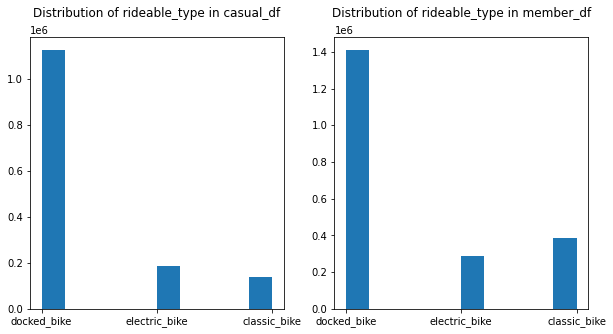

In [32]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.hist(casual_df['rideable_type'])
ax2.hist(member_df['rideable_type'])

ax1.set_title("Distribution of rideable_type in casual_df", pad = 20.)
ax2.set_title("Distribution of rideable_type in member_df", pad = 20.)

plt.show()

Docked bike account for a higher percentage of all usage compared to other types with both casual customer and annual member. 

## Analysis on ride_length

[Text(0.5, 1.0, 'Distribution of ride_length in member_df')]

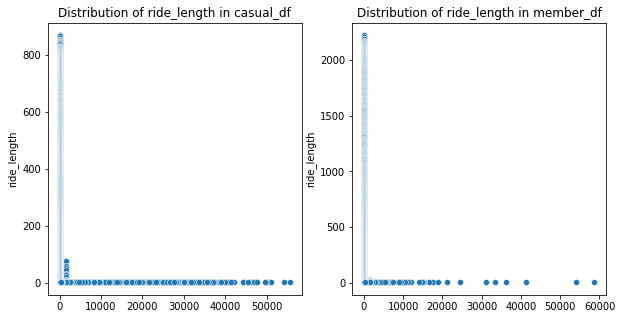

In [33]:
figure, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(data=casual_df['ride_length'].value_counts(),ax=ax1).set(title = "Distribution of ride_length in casual_df")
sns.scatterplot(data=member_df['ride_length'].value_counts(),ax=ax2).set(title = "Distribution of ride_length in member_df")

Almost trips for members tend to have short durations, while casual users tend to keep a bike longer at each rent 

## Top popular stations

### Top 10 popular start stations 

In [34]:
start_station_member = member_df['start_station_name']\
                              .value_counts().head(10).sort_values()

In [35]:
start_station_casual = casual_df['start_station_name']\
                              .value_counts().head(10).sort_values()

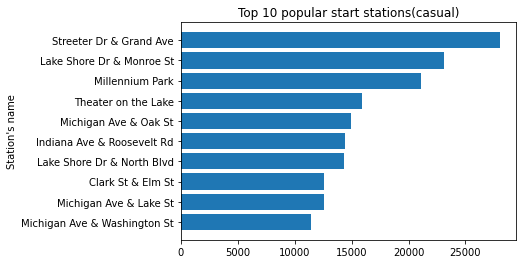

In [36]:
plt.barh(start_station_casual.index, start_station_casual[:])
plt.title('Top 10 popular start stations(casual)')
plt.ylabel("Station's name")
plt.show()

Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St and Millennium Park are top stations that casual users choose to start their trips.

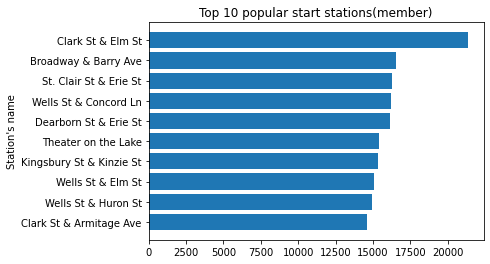

In [37]:
plt.barh(start_station_member.index, start_station_member[:])
plt.title('Top 10 popular start stations(member)')
plt.ylabel("Station's name")
plt.show()

Clark St & Elm St, St. Clair St & Erie St and Broadway & Barry Ave are most often start stations by members.

### Top 10 popular end stations

In [38]:
end_station_member = member_df['end_station_name']\
                              .value_counts().head(10).sort_values()

In [39]:
end_station_casual = casual_df['end_station_name']\
                              .value_counts().head(10).sort_values()

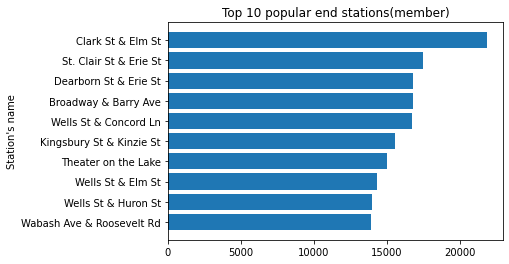

In [40]:
plt.barh(end_station_member.index, end_station_member[:])
plt.title('Top 10 popular end stations(member)')
plt.ylabel("Station's name")
plt.show()

Clark St & Eim St, St. Clair St & Erie St and Dearborn St & Erie St are top stations that annual users choose to end their trips.

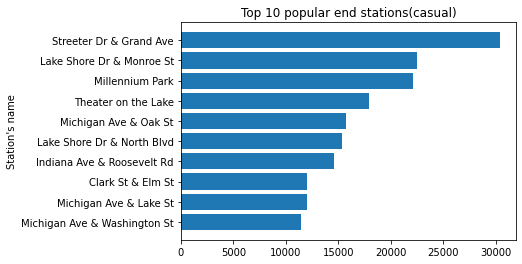

In [41]:
plt.barh(end_station_casual.index, end_station_casual[:])
plt.title('Top 10 popular end stations(casual)')
plt.ylabel("Station's name")
plt.show()

Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St and Milennium Park are most often start stations by casual.

## Time series of casual and member

In [42]:
timeseries_casual = casual_df['date'].value_counts().sort_index()

In [43]:
timeseries_member = member_df['date'].value_counts().sort_index()

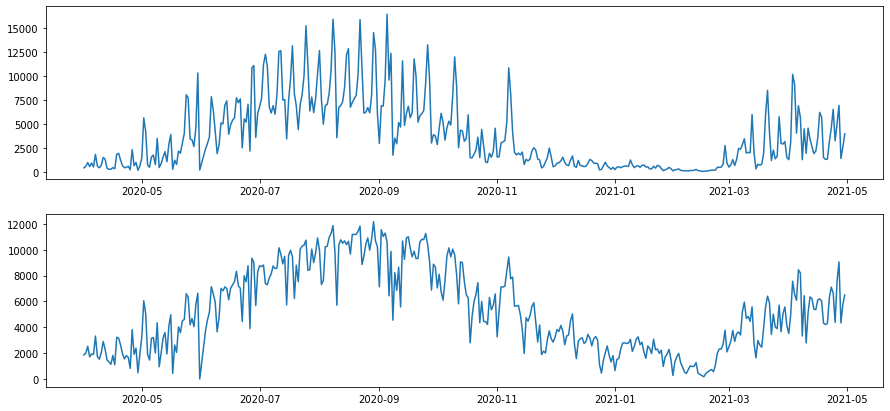

<Figure size 1600x500 with 0 Axes>

In [44]:
# Draw Plot
figure, (ax1,ax2) = plt.subplots(2,1, figsize=(15,7))
plt.figure(figsize=(16,5), dpi=100)

xlabel = "Date"
ylabel = "Counts"

ax1.plot(timeseries_casual.index, timeseries_casual[:])
ax2.plot(timeseries_member.index, timeseries_member[:])

plt.show()

ax1.set_title("Time series of casual customers")
ax2.set_title("Time series of member customers")

ax1.xlabel = xlabel
ax1.xlabel = xlabel

ax1.ylabel = ylabel
ax1.ylabel = ylabel

* Both member and casual use appear to be seasonal, with higher usage during summer time and lower usage during winter. 

* Casual usage has more obvious seasonality than member use, which peak from July to October and drop to a very low usage in months from December to February. 

## Act

* Both member and casual usages are obviously seasonal, with usage peak during summer time and slack during winter -> The timing of the advertising and promotions during a year 

* Casual users tend to use bikes more in weekends, as compared to weekdays. Promotions and adversting on weekends could have better results

* During 13:00 to 19:00 of a day, promotions for usage during that period of time would be attractive and any difference in privilege over that period of time could be a good reason for users to choose membership

* Based on top start/end stations of casual users, Advertising could be concentrated on those stations. 

* There must be special reasons why some stations are most often used by members.  Further surveys and research to find out the reason and exploit it may take great benefits